# Select Best Milk Features

In this jupyter notebook we use front-face fluorescence spectroscopy data (measured with SFF-2 "Fluoran", VIIOFI, Russia) and dynamic light scattering data (measured with Malvern Zetasizer Nano, Malvern Instruments Inc., UK) to select the best features while building milk heat-treatment evaluation models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


%matplotlib inline

## Load milk data into the notebook

In [2]:
data = pd.read_excel('Milk data for SelectKBest.xlsx', sheetname=0)
data # show the data

,l,Tryptophan,Maillard reaction products,520 nm,Vitamin A,Particle size,Polydispersity Index,Class
0,SOM,30.973000,10.7010,6.9371,9.2733,177.900,0.1810,1
1,SCM,25.079000,10.2570,6.2845,9.9450,410.800,0.3710,1
2,Agusha,15.151000,8.2755,10.9570,6.5617,337.300,0.1460,1
3,Asen,33.264000,5.3260,7.5009,15.1400,252.400,0.2070,0
4,BJA,36.493000,6.5246,7.8542,19.2140,281.600,0.2320,0
5,MB,32.289000,4.0359,8.0091,12.9680,243.600,0.2010,0
6,Vkusnoe,33.701000,5.6777,7.6136,17.6770,225.200,0.1780,0
7,DvD,35.783000,6.1661,8.0259,15.3080,276.500,0.1850,0
8,KK,38.236000,7.2992,11.6460,15.4650,246.600,0.2220,0
9,OP,36.777000,6.5409,7.5072,18.7380,311.100,0.2550,0


Define the vector of predictors

In [3]:
predictors = ["Tryptophan", "Maillard reaction products", "Vitamin A", "Particle size", "Polydispersity Index"]

Scale the data to [-1, 1]

In [4]:
scaler = StandardScaler()
scaler.fit(data[predictors])

data_scaled = pd.DataFrame(data=scaler.transform(data[predictors]), columns=predictors)

data_scaled

,Tryptophan,Maillard reaction products,Vitamin A,Particle size,Polydispersity Index
0,0.015900,-0.038907,-1.067613,-1.407585,-0.220208
1,-0.429652,-0.145827,-0.945474,2.272999,2.064026
2,-1.180150,-0.622995,-1.560681,1.111458,-0.640988
3,0.189086,-1.333267,-0.000833,-0.230241,0.092371
4,0.433179,-1.044631,0.739969,0.231215,0.392928
5,0.115382,-1.643938,-0.395782,-0.369309,0.020238
6,0.222121,-1.248574,0.460487,-0.660090,-0.256275
7,0.379508,-1.130962,0.029716,0.150618,-0.172119
8,0.564940,-0.858099,0.058264,-0.321900,0.272705
9,0.454648,-1.040706,0.653415,0.697412,0.669441


Select the most relevant predictors from the predictors list by the ANOVA F-value.

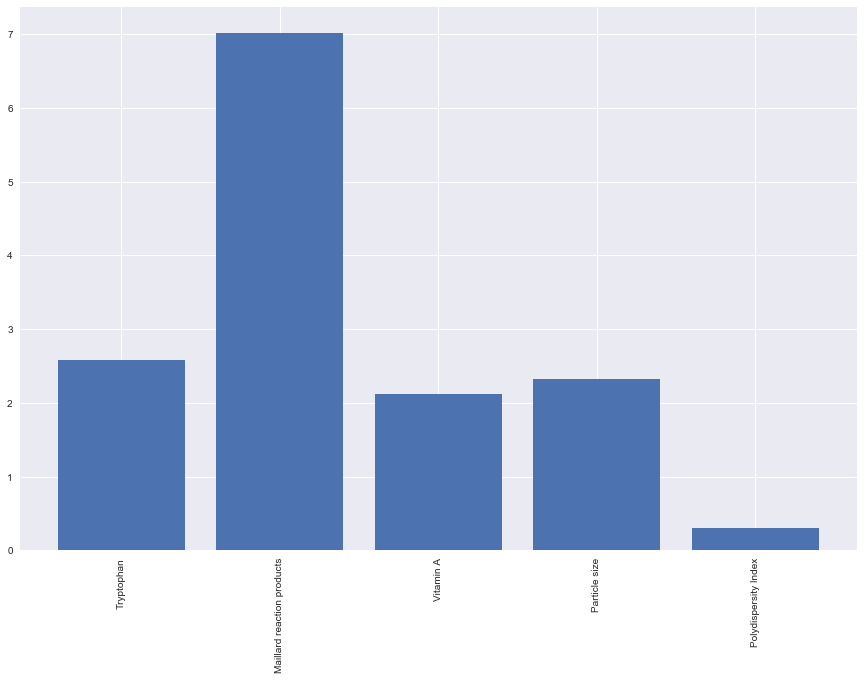

In [5]:
selector = SelectKBest(f_classif, k=5)
selector.fit(data_scaled[predictors], data["Class"])

scores = -np.log10(selector.pvalues_)

plt.figure(figsize=(15, 10))
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()